# Tutorial 3: Interpolate bathymetry data
This tutorial shows how to interpolate bathymetry data in either polar (lat,lon) or planar (x,y) coordinates.

First, we creater a 'reader' for the bathymetry data file (cf. Tutorial 1). 

In [1]:
from kadlu.bathy_reader import BathyReader

filename = 'assets/BathyData_Mariana_500kmx500km.mat'

reader = BathyReader(input=filename, lat_name='latgrat', lon_name='longrat', bathy_name='mat')

Next, we create an 'interpolator', like this

In [2]:
from kadlu.bathy_interpolator import BathyInterpolator

interp = BathyInterpolator(bathy_reader=reader)

The interpolator has two interpolation functions, one that works in polar coordinates (latitude, longitude), and one that works in planar coordinates (x, y). These functions were interpolated on regulard grids. We can access the grid points (or, nodes) as follows,

In [3]:
# nodes of the latitude-longitude grid
lats = interp.lat_nodes
lons = interp.lon_nodes

# print the min and max values and the number of nodes.
# (note that the nodes are always strictly ascending)
print('Lat range: {0:.2f} to {1:.2f} degrees north ({2} nodes)'.format(lats[0], lats[-1], len(lats)))
print('Lon range: {0:.2f} to {1:.2f} degrees east ({2} nodes)'.format(lons[0], lons[-1], len(lons)))

Lat range: 8.68 to 13.65 degrees north (153 nodes)
Lon range: 139.72 to 144.52 degrees east (145 nodes)


Note that the planar coordinate system is oriented so that x corresponds to longitude and y corresponds to latitude. By default the origin of the planar coordinate system was placed at the center when the interpolator was initialized. If we had wanted to use a different location as the origin of our planar coordinate system, we could have done it this way,

In [4]:
from kadlu.bathy_reader import LatLon

refloc = LatLon(9.0, 140)  # reference location at 9 deg N and 140 deg E

interp = BathyInterpolator(bathy_reader=reader, origin=refloc)

We can evaluate the bathymetry at any position we like, using either polar or planar coordinates. For example, we may evaluate the bathymetry at the reference location:

In [5]:
depth_ll = interp.eval_ll(lat=9, lon=140) # using polar coordinates
depth_xy = interp.eval_xy(x=0, y=0) # using planar coordinates

# check that the two interpolation schemes agree
print('Polar: {0:.1f} m'.format(depth_ll))
print('Planar: {0:.1f} m'.format(depth_xy))

Polar: -3221.0 m
Planar: -3221.0 m


If we need to evaluate the bathymetry at multiple locations, there are two ways of doing this:

In [6]:
x = [0, 1000, 2000]  # x coordinates in meters
y = [6000, 7000, 8000]  # y coordinates in meters

bathy_i = interp.eval_xy(x=x, y=y)  # evaluate bathymetry at positions (x[i],y[i]); i=0,1,2
bathy_ij = interp.eval_xy(x=x, y=y, grid=True)  # evaluate bathymetry at positions (x[i],y[j]); i=0,1,2; j=0,1,2

print(bathy_i,'\n')
print(bathy_ij)

[-4032.99122294 -4134.23170066 -4219.32208753] 

[[-4032.99122294 -4158.67603169 -4267.05785994]
 [-3998.04511667 -4134.23170066 -4252.79528574]
 [-3946.27487194 -4092.08168135 -4219.32208753]]


So, in the first case we match the elements in x and y row-by-row - this gives us 3 positions - whereas in the second case we construct all possible combinations of the elements in x and y, which gives us 9 different positions. In the first case, x and y must have the same length; in the second case, their lengths can be different.

Finally, we can display the elevation as a surface map in polar coordinates:

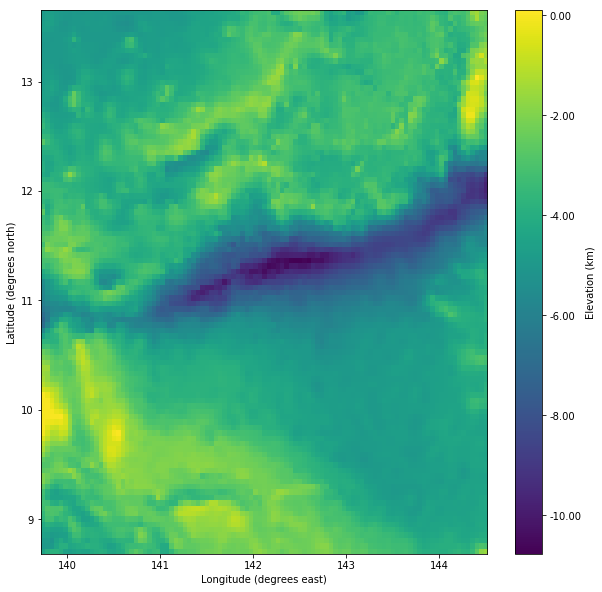

In [7]:
import matplotlib.pyplot as plt

fig = interp.plot_ll()  # draw elevation map using polar coordinates
plt.show()

Or planar coordinates:

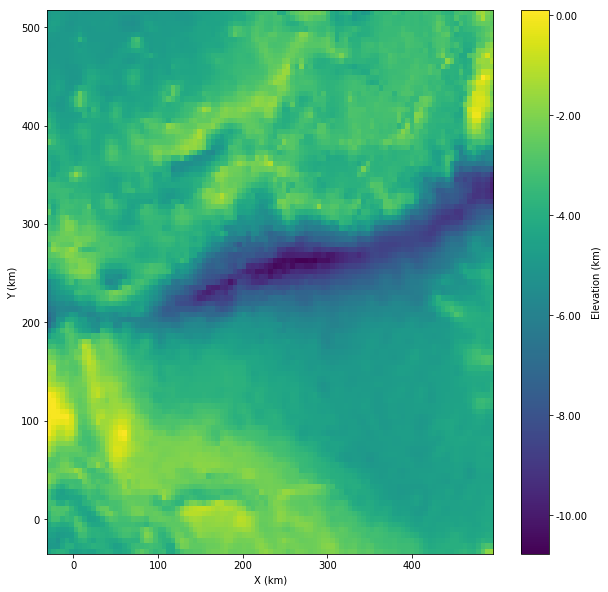

In [8]:
fig = interp.plot_xy()  # draw elevation map using planar coordinates
plt.show()

It is possible to change the axes ranges and binning, like this:

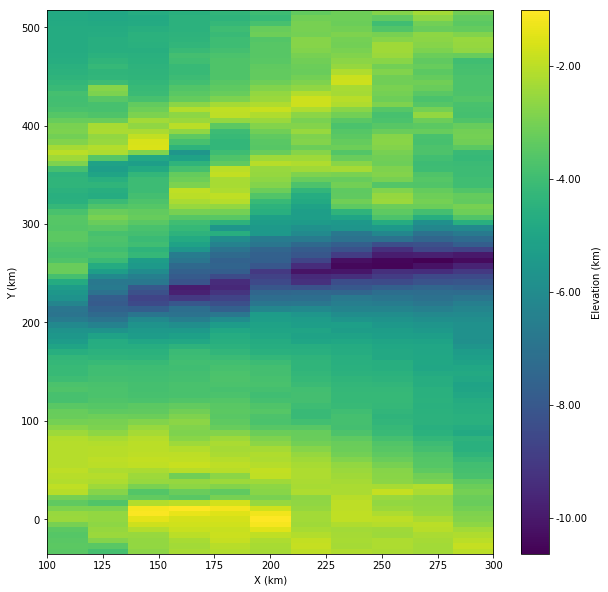

In [9]:
fig = interp.plot_xy(x_bins=10, x_min=100e3, x_max=300e3)  # plot only x-values between 100 and 300 km, divided into 10 bins
plt.show()